# Problem 1 
Load Iris data. Estimate the SVM classifier of three types of Iris using hard margin SVM (C = Inf) cross-validation = 3. Use the code below.For fit measure use default cross-validation score -- share correct predictions. Can you estimate the model? If you cannot why?

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
from sklearn.svm import SVC
# import datasets
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,(1,2)]  # Use all X
y = iris["target"]
virginica_or_versicolor = (y == 2) | (y == 1)
X = X[virginica_or_versicolor]
y = y[virginica_or_versicolor]

In [ ]:
from sklearn.model_selection import cross_val_score
svm_clf = SVC(kernel="linear", C=float("inf"))
scores = cross_val_score(svm_clf, X, y, cv=3)
np.mean(scores)

In [ ]:
# I cannot estimate the model, because of impossible operation attempted. 

# Problem 2
Run the same model with a soft margin: C = 1 and plot decision boundary. Don't forget to use 
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ms") when plotting instead of plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms"). Describe the results in Problem 2 and 1. Why do we get these results?

In [3]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Unscaled')

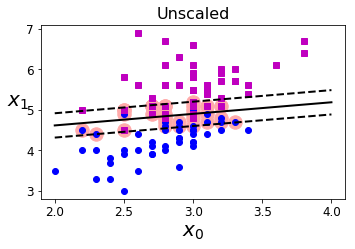

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Get plot and intercept
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # we predict positive or negative. The formula for the line is:
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    # line as a function of x0
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]# add margin
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ms")
plot_svc_decision_boundary(svm_clf, 2, 4)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)

In [ ]:
# According to figure 1, we can see there are some overlapping points. They cannot be sperated by a line. 
# So we cannot estimate a hard-margin model.     

# Problem 3: 
Reestimate model in problem 2 with a) optimal C parameter. Loop through a vector 1000 random numbers from .01 to 10.  b) scaled data and C = 1. Which produces better cross-validation score?

In [5]:
np.random.seed(42)
cvec = np.random.uniform(0.01,10,1000)

In [6]:
from sklearn.model_selection import cross_val_score
scores=[]
for i in cvec: 
    svm_clf = SVC(kernel="linear", C=i)
    svm_clf.fit(X, y)
    score = cross_val_score(svm_clf, X, y, cv=3)
    scores.append(np.mean(score))
scores.index(min(scores))

16

In [7]:
min(scores)

0.9209558823529411

In [ ]:
# We can know the 15th loop is the optimal choice for C, so we have C= 0.01*15=0.15. 
# Now the min score is 0.9209558823529411.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_scaled, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Text(0.5,1,'Scaled')

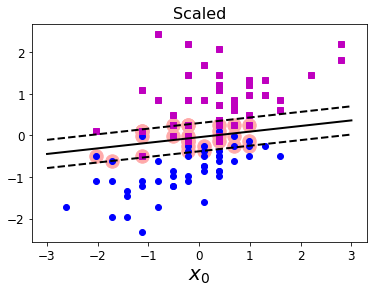

In [9]:
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==2], X_scaled[:, 1][y==2], "ms")
plot_svc_decision_boundary(svm_clf, -3, 3)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)

In [10]:
score_1 = cross_val_score(svm_clf, X_scaled, y, cv=3)
np.mean(score_1)

0.9209558823529411

In [11]:
np.mean(score_1) == min(scores)

True

In [17]:
# We can see that two scores equal with each other. 
# In other words, when we scale variables, we automatically use the optimal C to do the estimation. 

# Problem 4 
Use full data for Irises. Use scaled data created below. Estimate baseline SVM model with C = 1, calculate cross-validation score with cv =5.  The estimate the same model with 5th degree polynomial of X. Report averages for both models.

In [12]:
np.random.seed(42)
from sklearn.svm import SVC
# import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
X_sc = scaler.fit_transform(X)
poly = PolynomialFeatures(5)
X2 = poly.fit_transform(X)
X_poly = scaler.fit_transform(X2)

In [13]:
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_sc, y)
score_sc = cross_val_score(svm_clf, X_sc, y, cv=5)
np.mean(score_sc)

0.9666666666666668

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
# Create polynomial degress 3
        ("poly_features", PolynomialFeatures(degree=5)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [15]:
score_poly = cross_val_score(polynomial_svm_clf, X, y, cv=5)
np.mean(score_poly)

0.9800000000000001

In [ ]:
# linear model has a lower cross-validation score 

# Problem 5 
Create a datasets of moons below. Estimate the SVM model using 10 degress polynomial and C =1. Create polynomials in two ways: a) use PolynomialFeatures(degree=10), b) use kernel SVC(kernel="poly", degree=10, coef0=1, C=1). Use cross-validation cv =5 and report average score. Measure the time of using a kernel relatively to the polynomial features. 

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.25, random_state=42)

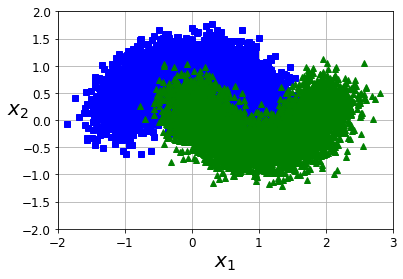

In [17]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-2, 3, -2, 2])
plt.show()

In [18]:
import time 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
t0 = time.time()
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)
t1 = time.time()
t = t1-t0
t

0.14385104179382324

In [19]:
score_poly_1 = cross_val_score(polynomial_svm_clf, X, y, cv=5)
np.mean(score_poly_1)

0.9416

In [20]:
from sklearn.svm import SVC
t0 = time.time()
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=1))
    ])
poly_kernel_svm_clf.fit(X, y)
t1 = time.time()
print(t1-t0)

5.052365064620972


In [21]:
score_poly_2 = cross_val_score(poly_kernel_svm_clf, X, y, cv=5)
np.mean(score_poly_2)

0.9437

In [ ]:
# Using a kernel costs more time and has higner cross-validation score than using the polynomial features.

# Problem 6
Run gaussian Kernel RBF with 10 degrees. 
Predict Y using cross-validation cv=5 and C =1. Report average score. Is it higher than the 10-degree polinomial?

In [23]:
from sklearn.model_selection import cross_val_predict
np.random.seed(42)
svm_rbf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree = 10, gamma=1, C=1))
    ])
#svm_rbf.fit(X, y)
X_sc = scaler.fit_transform(X)
y_predict = cross_val_predict(svm_rbf, X_sc, y, cv=5)

In [24]:
score_2 = cross_val_score(svm_rbf, X_sc, y_predict, cv=5)
np.mean(score_2)

0.9948995995998999

In [ ]:
# Yes, it is higher than 10-degree polynomial. 